<h2 id="Contents">Contents<a href="#Contents"></a></h2>
        <ol>
        <li><a class="" href="#Imports">Imports</a></li>
<li><a class="" href="#Outliers">Outliers</a></li>
<li><a class="" href="#sklearn-Tools-for-Outliers">sklearn Tools for Outliers</a></li>
<li><a class="" href="#Automatic-Outlier-Detection">Automatic Outlier Detection</a></li>
<ol><li><a class="" href="#Statistical-Methods">Statistical Methods</a></li>
<ol><li><a class="" href="#Z-Score">Z-Score</a></li>
<li><a class="" href="#IQR-Score">IQR Score</a></li>
<li><a class="" href="#Thresholding">Thresholding</a></li>
</ol><li><a class="" href="#Visualization">Visualization</a></li>
<ol><li><a class="" href="#Box-Plot">Box Plot</a></li>
<li><a class="" href="#Scatter-Plot">Scatter Plot</a></li>
<li><a class="" href="#Histogram">Histogram</a></li>
</ol><li><a class="" href="#Models">Models</a></li>
<ol><li><a class="" href="#Isolation-Forest">Isolation Forest</a></li>
<li><a class="" href="#Autoencoders">Autoencoders</a></li>
<li><a class="" href="#ODIN">ODIN</a></li>
<li><a class="" href="#Local-Outlier-Factor">Local Outlier Factor</a></li>
<li><a class="" href="#Minimum-Covariance-Determinant">Minimum Covariance Determinant</a></li>
<li><a class="" href="#One-Class-SVM">One-Class SVM</a></li>
<li><a class="" href="#DBSCAN">DBSCAN</a></li>
<li><a class="" href="#KNN">KNN</a></li>
<li><a class="" href="#K-Means">K-Means</a></li>
</ol>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('dark_background')

# Outliers

- Outliers can be bad for boosting because boosting builds each tree on previous trees' residuals/errors. Outliers will have much larger residuals than non-outliers, so gradient boosting will focus a disproportionate amount of its attention on those points. Apart from AdaBoost, Linear Regression, Logistic Regression and Deep Learning models are also very sensitive. Weight calculating algorithms usually are.
- IQR for Outliers 
- (2.5 percentile and 97.5)
- More variance column should be prefered

The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance, especially those models that calculate "weights", like linear regression, logistic regression, and neural networks. The same is also valid for boosting algorithms like gradient boosting and AdaBoost. Outliers can be bad for boosting because boosting builds each tree on previous trees' residuals/errors. Outliers will have much larger residuals than non-outliers, so gradient boosting will focus a disproportionate amount of its attention on those points.

The most common or familiar type of outlier is the observations that are far from the rest of the observations or the center of mass of observations.

Outliers can skew statistical measures and data distributions, providing a misleading representation of the underlying data and relationships. Removing outliers from training data prior to modeling can result in a better fit of the data and, in turn, more skillful predictions.

Two important distinctions must be made:

**outlier detection**
The training data contains outliers which are defined as observations that are far from the others. Outlier detection estimators thus try to fit the regions where the training data is the most concentrated, ignoring the deviant observations.

**novelty detection**
The training data is not polluted by outliers and we are interested in detecting whether a new observation is an outlier. In this context an outlier is also called a novelty.

# `sklearn` Tools for Outliers

The scikit-learn project provides a set of machine learning tools that can be used both for novelty or outlier detection. This strategy is implemented with objects learning in an unsupervised way from the data:
``` python
estimator = estimator.fit(X)
```

new observations can then be sorted as inliers or outliers with a `predict` method:
``` python
y_pred = estimator.predict(X)
```

Inliers are labeled `1`, while outliers are labeled `-1`. The predict method makes use of a threshold on the raw scoring function computed by the estimator. This scoring function is accessible through the `score_samples` method, while the threshold can be controlled by the `contamination` parameter.

Note that `neighbors.LocalOutlierFactor` does not support `predict`, and `score_samples` methods by default but only a `fit_predict` method, as this estimator was originally meant to be applied for outlier detection. The scores of abnormality of the training samples are accessible through the `negative_outlier_factor_` attribute.

A comparison of the outlier detection algorithms in scikit-learn is in the figure below:

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_anomaly_comparison_001.png)

# Automatic Outlier Detection

There are many algorithms and visualization methods which can be used to detect outliers. Here we will discuss some of the most common methods.

## Statistical Methods

### Z-Score

The Z-score(also called the standard score) is an important concept in statistics that indicates how far away a certain point is from the mean. By applying Z-transformation we shift the distribution and make it 0 mean with unit standard deviation. For example — A Z-score of 2 would mean the data point is 2 standard deviation away from the mean. We calculate z-score by:
$$
z = \frac{x - \mu}{\sigma}
$$

![](https://miro.medium.com/max/640/1*tRDusoSDEMmPbBLdjWsfjw.png)

Assuming that the data is normally distributed, a z-score greater than 3 can be safely treated as an outlier.

In [2]:
data = [1, 2, 3, 2, 1, 100, 1, 2, 3, 2, 1]
threshold = 3
mean = np.mean(data)
std = np.std(data)
z_score_outlier = [i for i in data if (i-mean)/std > threshold]
print(z_score_outlier)

[100]


### IQR Score

We can use the IQR method of identifying outliers to set up a “fence” outside of Q1 and Q3. Any values that fall outside of this fence are considered outliers. To build this fence we take 1.5 times the IQR and then subtract this value from Q1 and add this value to Q3. This gives us the minimum and maximum fence posts that we compare each observation to. Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers. Here,
* Q1 represents the 25th percentile of the data.
* Q2 represents the 50th percentile of the data.
* Q3 represents the 75th percentile of the data.

In [5]:
data = [6, 2, 3, 4, 5, 1, 50]
sort_data = np.sort(data)
sort_data

array([ 1,  2,  3,  4,  5,  6, 50])

In [7]:
Q1 = np.percentile(data, 25) 
Q2 = np.percentile(data, 50) 
Q3 = np.percentile(data, 75) 
  
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  2.5
Q1 50 percentile of the given data is,  4.0
Q1 75 percentile of the given data is,  5.5
Interquartile range is 3.0


In [9]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)


outlier =[]
for x in data:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('outlier in the dataset is', outlier)

low_limit is -2.0
up_limit is 10.0
outlier in the dataset is [50]


We can also use a box plot to visualize the outliers. See the section on box plots below.

### Thresholding

Another way to identify outliers is to use a threshold. We can set a lower threshold, say 3 percentile, and any values below that are considered outliers. Similarly, we can set an upper threshold, say 97 percentile, and any values above that are considered outliers.

In [16]:
X = np.random.normal(0, 3, 100)
three_per = np.percentile(X, 3)
print(three_per)
ninety_seven_per = np.percentile(X, 97)
print(ninety_seven_per)

-5.6246452193141305
5.297384738888506


In [17]:
for x in X:
    if x<three_per or x>ninety_seven_per:
        print(x, end=' ')

6.505061546696968 -8.57949509531378 -6.284713922581627 6.697449138027313 -6.466401658166367 5.7502335597524175 

## Visualization

### Box Plot

In [55]:
data = pd.read_csv("./housing.csv")

Box plot is very simple visualization tool to detect outliers which use the concept of Interquartile range (IQR) technique.

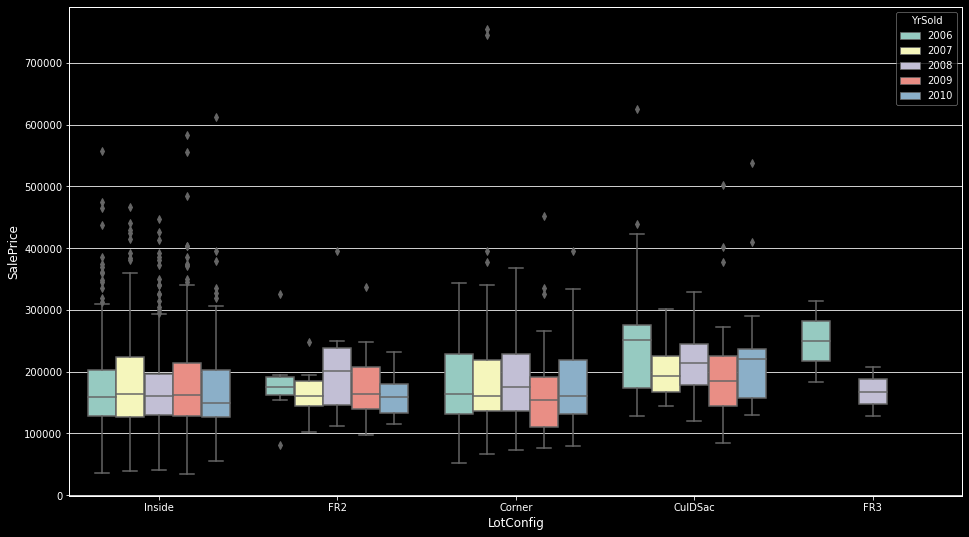

In [62]:
sns.boxplot(x='LotConfig', y='SalePrice', data=data, hue = "YrSold");

We can see a lot of outliers!

### Scatter Plot

Scatter plots can be used to explicitly detect when a dataset or particular feature contains outliers. Let's use Ames dataset to demonstrate this.

<AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>

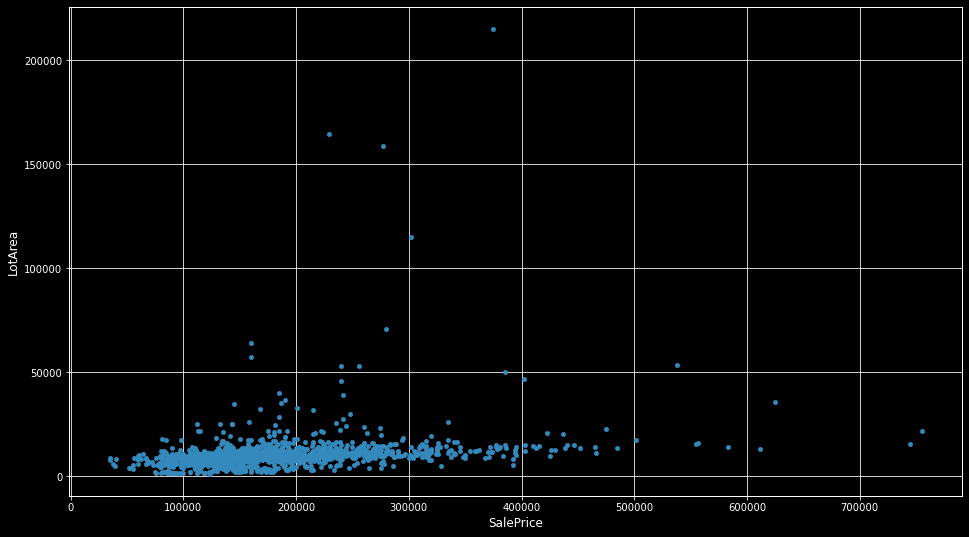

In [51]:
data.plot(kind="scatter", x= "SalePrice", y="LotArea")

We can clearly see some outliers. These are:

In [52]:
data[(data["SalePrice"]<400000) & (data["LotArea"]>100000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


### Histogram

Histogram can also be used to detect outliers. If we have a bar that is too far away from the rest of the bars, it is an outlier.

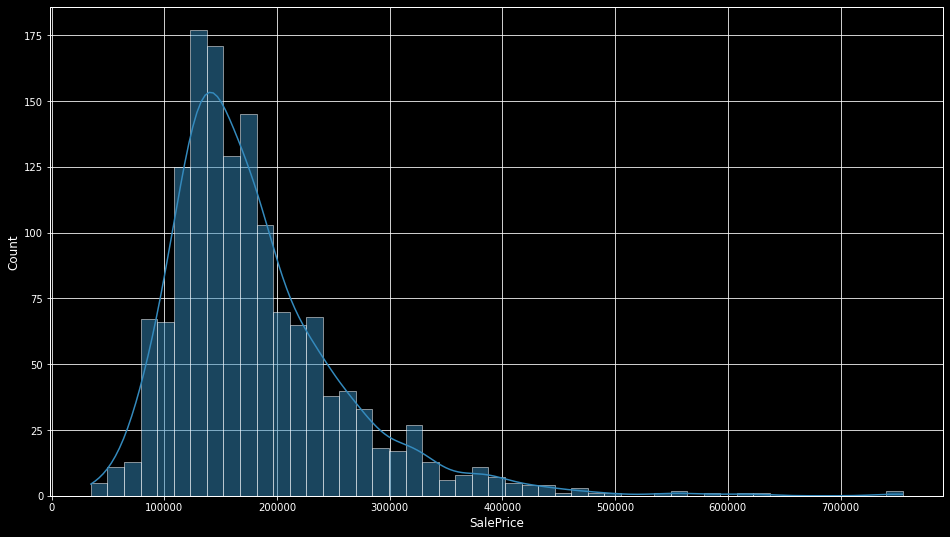

In [64]:
sns.histplot(data["SalePrice"], kde=True);

We can see that prices after 500,000 are outliers.

## Models

### Isolation Forest


Isolation Forest is a tree-based algorithm that tries to find out outliers based on the concept of decision boundaries(just like we have for decision trees). The idea over here is to keep splitting the data at random thresholds and feature till every point gets isolated(it’s like overfitting a decision tree on a dataset). Once the isolation is achieved we chunk out points that got isolated pretty early during this process. And we mark these points as potential outliers. If you see this intuitively, the farther a point is from the majority, the easier it gets to isolate, whereas, isolating the points that are part of a group would require more cuts to isolate every point.

![](https://miro.medium.com/max/720/1*-4zTo64uS8wpMmcYhEGtqg.png)

`sklearn` provides a class `IsolationForest` for this task. The implementation of `ensemble.IsolationForest` is based on an ensemble of `tree.ExtraTreeRegressor`. The maximum depth of each tree is set to $\lceil \log_2(n) \rceil$ where $n$ is the number of samples used to build the tree.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_isolation_forest_001.png)

In [18]:
from sklearn.ensemble import IsolationForest
data = [[1, 1], [2, 2.1], [1, 2], [2, 1], [50, 35], [2, 1.5]]
iforest = IsolationForest(n_estimators=5)
iforest.fit(data)

array([1])

In [20]:
for d in data:
    print(iforest.predict([d]))

[1]
[1]
[1]
[1]
[-1]
[1]


### Autoencoders

Autoencoders are Neural network architectures that are trained to reproduce the input itself. It consists of two trainable components namely — Encoder and Decoder. Where the goal of the encoder is to learn a latent representation of the input(original dimension to low dimension) and the goal of the decoder is to learn to reconstruct the input from this latent representation(low dimension to original dimension). So for the autoencoder to work well, both of these components should optimize on their respective tasks.

Autoencoders are widely used for detecting anomalies. A typical intuition behind how this works is that if a point in feature space lies far away from the majority of the points(meaning it holds different properties, for example — dog images clustered around a certain part of the feature space and cow image lies pretty far from that cluster), in such cases, the autoencoder learns the dog distribution (because of the count of dog images would be very high compared to cows — that’s why it’s an anomaly, hence model would majorly focus on learning the dog cluster). This means, the model would be able to more or less correctly re-generate the dog images leading to low loss values, whereas, for the cow image it would generate high loss(because that’s something odd it saw for the first time and the weights it has learnt is mostly to reconstruct dog images). We use these reconstruction loss values as the anomaly scores, so Higher the scores, the higher the chances of input being an anomaly.

### ODIN

In Outlier Detection using In-degree Number (ODIN), we calculate the in-degree for each of the data points. Here, in-degree is defined as the number of nearest neighbour sets to this point belongs. Higher this value, the more the confidence of this point belonging to some dense region in the space. Whereas, on the other side, a lesser value of this would mean that it’s not part of many nearest neighbour sets and is kind of isolated in the space. You can think of this method to be the reverse of KNN.

![](https://miro.medium.com/max/640/1*z73ozy-zCMMW1v9dmeGddg.png)

Here in the figure, we set the value of k(nearest neighbours)=3, the redpoint belong to just one nearest neighbour set which is of bluepoint, whereas, all other points are part of more than 1 nearest neighbour sets. Hence, we conclude that redpoint is an outlier.

In [27]:
import package_outlier as po
data = [[1, 1], [2, 2.1], [1, 2], [2, 1], [50, 35], [2, 1.5]]
result = po.LocalOutlierFactorOutlier(data, n_neighbors=2, metric='manhattan')
print(result)

[[50, 35]]


### Local Outlier Factor

In Local Outlier Factor (LOF), the idea revolves around the concept of local regions. Here, we calculate and compare the local density of the focus point with the local density of its neighbours. If we find that the local density of the focus point is very low compared to its neighbours, that would kind of hint that the focus point is isolated in that space and is a potential outlier. The algorithm depends on the hyperparameter K, which decides upon the number of neighbours to consider when calculating the local density. This value is bounded between 0 (no neighbour) and the total points (all points being neighbour) in the space.

The local density function is defined as the reciprocal of average reachability distance, where, average reachability distance is defined as the average distance from the focus point to all points in the neighbour.

If
- LOF ≈ 1 similar density as neighbors
- LOF < 1 higher density than neighbors (normal point)
- LOF > 1 lower density than neighbors (anomaly)


We can use `sklearn.neighbors.LocalOutlierFactor` to detect outliers. The `neighbors.LocalOutlierFactor` (LOF) algorithm computes a score (called local outlier factor) reflecting the degree of abnormality of the observations. It measures the local density deviation of a given data point with respect to its neighbors. The idea is to detect the samples that have a substantially lower density than their neighbors.

In practice the local density is obtained from the k-nearest neighbors. The LOF score of an observation is equal to the ratio of the average local density of its k-nearest neighbors, and its own local density: a normal instance is expected to have a local density similar to that of its neighbors, while abnormal data are expected to have much smaller local density.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_lof_novelty_detection_001.png)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
data = [[1, 1], [2, 2.1], [1, 2], [2, 1], [50, 35], [2, 1.5]]
lof = LocalOutlierFactor(n_neighbors=2, metric='manhattan')
prediction = lof.fit_predict(data)
print(prediction)

[ 1  1  1  1 -1  1]


We see that the second last pair is an outlier.

### Minimum Covariance Determinant

One common way of performing outlier detection is to assume that the regular data come from a known distribution (e.g. data are Gaussian distributed). From this assumption, we generally try to define the “shape” of the data, and can define outlying observations as observations which stand far enough from the fit shape.

The scikit-learn provides access to this method via the `EllipticEnvelope` class. It provides the `contamination` argument that defines the expected ratio of outliers to be observed in practice. In this case, we will set it to a value of 0.01, found with a little trial and error.

For instance, assuming that the inlier data are Gaussian distributed, it will estimate the inlier location and covariance in a robust way (i.e. without being influenced by outliers). The Mahalanobis distances obtained from this estimate is used to derive a measure of outlyingness. This strategy is illustrated below.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_mahalanobis_distances_001.png)

In [41]:
from sklearn.covariance import EllipticEnvelope

X = np.random.normal(0, 3, 100)
ee = EllipticEnvelope(contamination=0.1)
ee.fit(X.reshape(-1, 1))  
pred = ee.predict(X.reshape(-1, 1))  
print(pred)

[ 1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1
  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1 -1  1  1
  1  1  1  1]


In [31]:
mask = pred == -1
outlier = X[mask]
print(outlier)

[ 6.6983  6.2194  5.4125  6.856  -5.3663  7.295  -6.2734 -4.9824 -5.4499
 -4.7525]


### One-Class SVM

The support vector machine, or SVM, algorithm developed initially for binary classification can be used for one-class classification.

When modeling one class, the algorithm captures the density of the majority class and classifies examples on the extremes of the density function as outliers. This modification of SVM is referred to as One-Class SVM.

The scikit-learn library provides an implementation of one-class SVM in the `OneClassSVM` class. The class provides the `nu` argument that specifies the approximate ratio of outliers in the dataset.

In [40]:
from sklearn.svm import OneClassSVM
ocs = OneClassSVM(nu=0.1)
ocs.fit(X.reshape(-1, 1))
pred = ocs.predict(X.reshape(-1, 1))
mask = pred == -1
outlier = X[mask]
print(outlier)

[ 0.6094  6.856  -5.3663  0.4836  0.7024  7.295   0.5496 -2.0894  0.7385
  0.812  -6.2734 -2.1171  0.4185 -5.4499 -2.098 ]


### DBSCAN

DBSCAN is a density-based and unsupervised machine learning algorithm. It takes multi-dimensional data as inputs and clusters them according to the model parameters — e.g. epsilon and minimum samples. Based on these parameters, the algorithm determines whether certain values in the dataset are outliers or not.

It groups ‘densely grouped’ data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points. The most exciting feature of DBSCAN clustering is that it is robust to outliers. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.

Let's use Iris dataset to understand DBSCAN clustering. We will use the `sklearn.cluster.DBSCAN` class to perform DBSCAN clustering.

In [50]:
df = pd.read_csv("https://raw.githubusercontent.com/Hari31416/Datasets/main/Iris.csv")
df.head()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[['SepalLength', 'SepalWidth']])

DBSCAN()

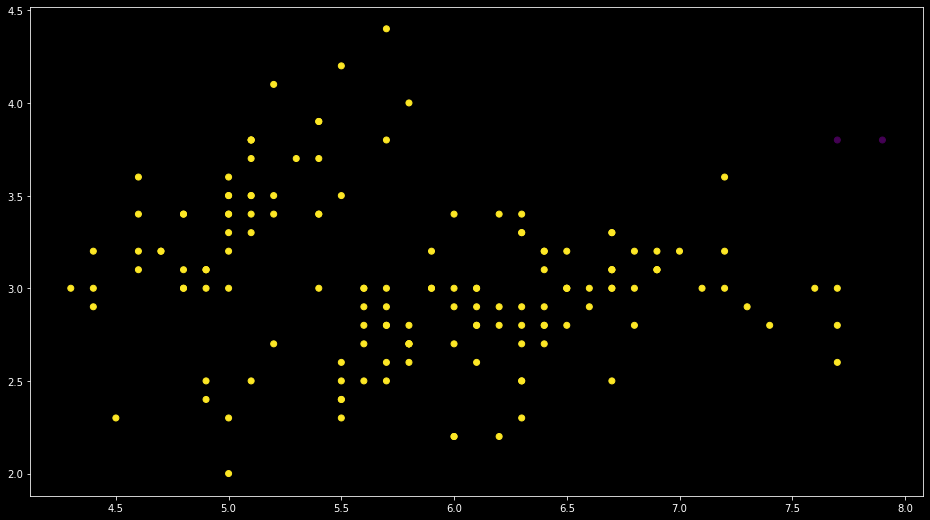

In [52]:
colors = dbscan.labels_
plt.scatter(df["SepalLength"], df["SepalWidth"], c = colors)

We can see the two outliers in purple color.

In [53]:
mask = dbscan.labels_ == -1
outlier = df[mask]
outlier

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
117,118,7.7,3.8,6.7,2.2,Iris-virginica
131,132,7.9,3.8,6.4,2.0,Iris-virginica


### KNN

Though KNN is a supervised learning algorithm, it can be used as outlier detector. Data scientists arbitrarily decide the cutoff values beyond which all observations are called anomalies. `sklearn.neighbors.NearestNeighbors` class can be used to find the nearest neighbors of a point. If the number of neighbors is less than the cutoff value, the point is considered an outlier.

In [54]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=5)

In [55]:
X = df[['SepalLength', 'SepalWidth']].values

In [56]:
nn.fit(X)

NearestNeighbors()

In [57]:
distance.shape

(150, 5)

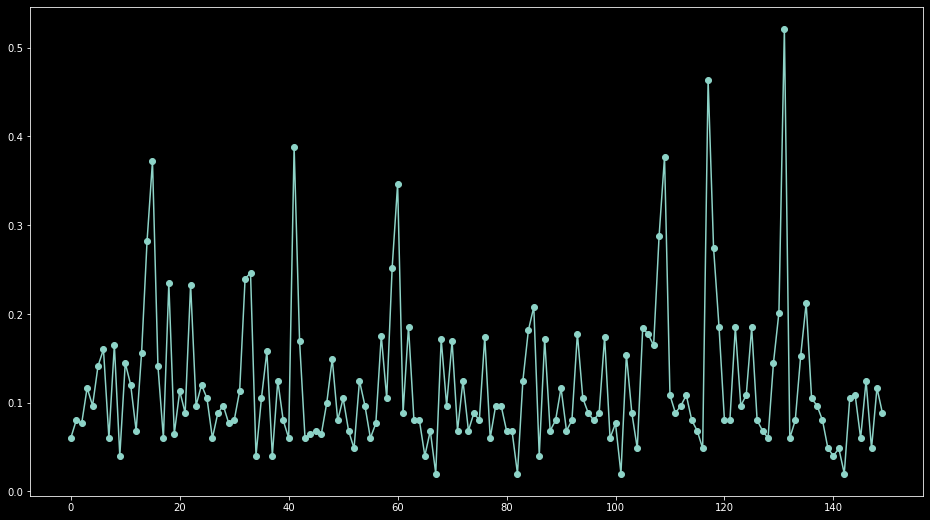

In [58]:
distance, index = nn.kneighbors(X)
plt.plot(distance.mean(axis=1), 'o-')

The spikes correspond to the outliers. Setting a threshold of 0.35, we can see that the outliers are:

In [59]:
thres = 0.35
mask = distance.mean(axis=1) > thres
outlier = df[mask]
outlier

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
41,42,4.5,2.3,1.3,0.3,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
131,132,7.9,3.8,6.4,2.0,Iris-virginica


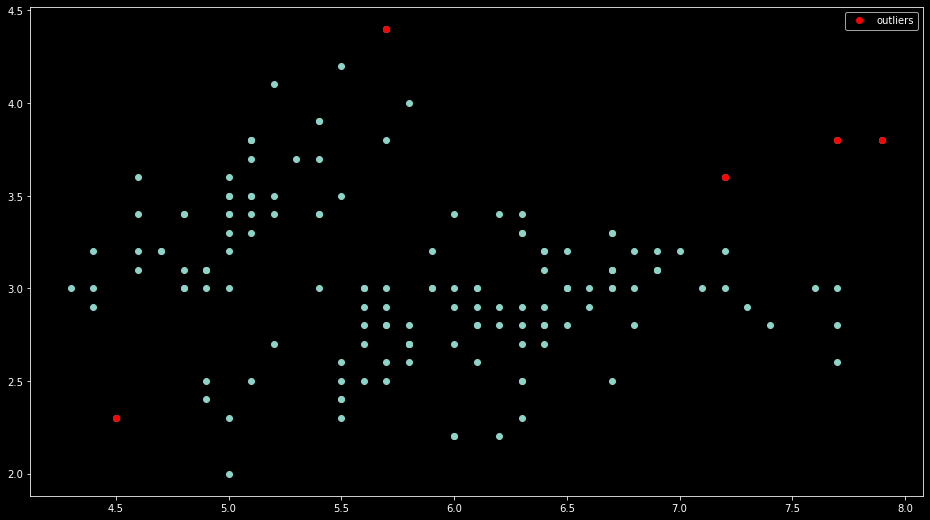

In [60]:
plt.plot(df["SepalLength"], df["SepalWidth"], 'o')
plt.plot(outlier["SepalLength"], outlier["SepalWidth"], 'ro', label="outliers")
plt.legend()
plt.show()

### K-Means

The K-Means is a clustering algorithm. In this method, K random points are selected as centroids in a dataset. Then, the elements are arranged to the closest centroids by calculating the distance. The process is repeated to achieve optimal distances between sample data and centroids.

Same as the above algorithm, K-Means can also be used to find outliers. The idea is to fit the K-Means with just one cluster. Then, the points that are farthest from the centroid are considered as outliers. We use a threshold to decide the outliers.

In [61]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)

KMeans(n_clusters=1)

In [62]:
centroids = kmeans.cluster_centers_
distances = kmeans.transform(X)

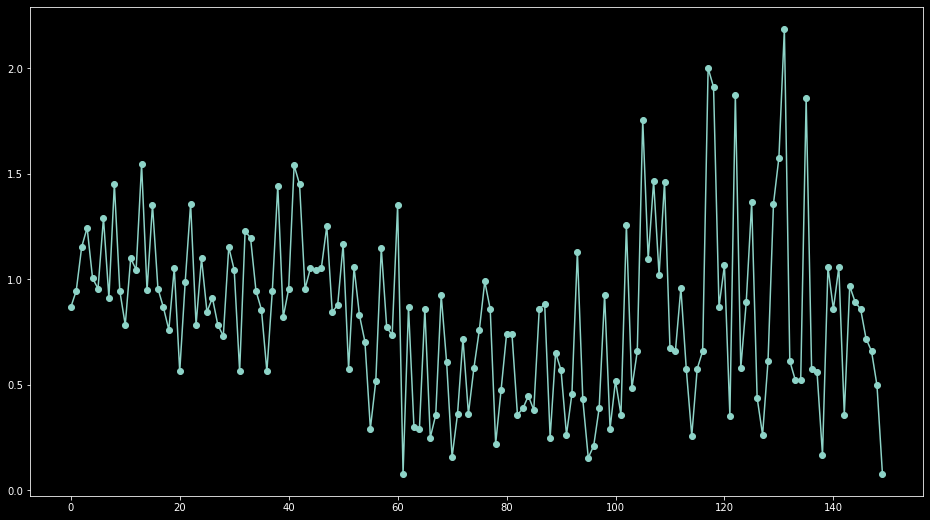

In [63]:
plt.plot(distances, "o-")

We'll take a threshold of 1.6. The outliers are:

In [64]:
thres = 1.6
mask = distances > thres
outlier = df[mask]
outlier

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
105,106,7.6,3.0,6.6,2.1,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica
131,132,7.9,3.8,6.4,2.0,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica


Let's plot them!

In [65]:
centroids[0][0]

5.843333333333334

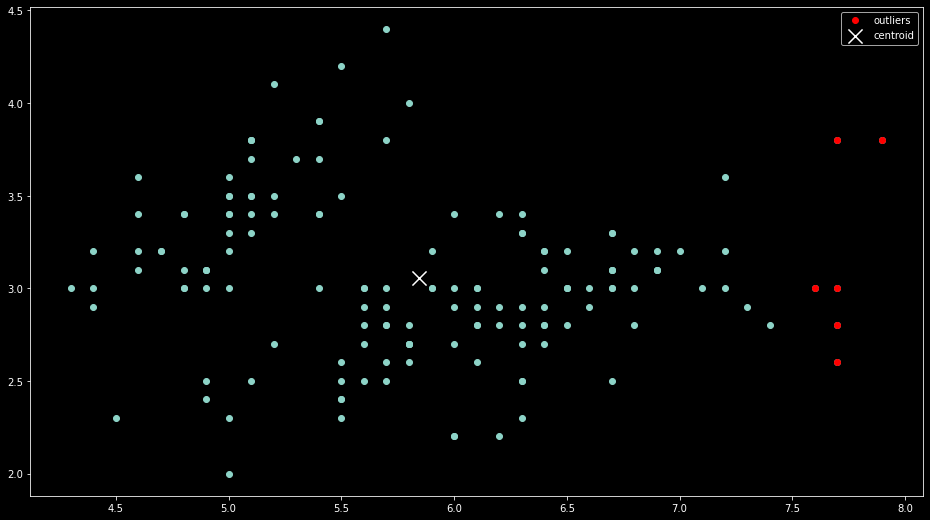

In [66]:
plt.plot(df["SepalLength"], df["SepalWidth"], 'o')
plt.plot(outlier["SepalLength"], outlier["SepalWidth"], 'ro', label="outliers")
plt.scatter(centroids[0][0], centroids[0][1], marker='x', s=200, c='w', label = "centroid")
plt.legend()
plt.show()